In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
dataset=pd.read_csv("DecisionTrees_titanic.csv")
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,38.0,1,0,71.2833,0
1,1,1,0,35.0,1,0,53.1000,2
2,0,1,1,54.0,0,0,51.8625,2
3,1,3,0,4.0,1,1,16.7000,2
4,1,1,0,58.0,0,0,26.5500,2
...,...,...,...,...,...,...,...,...
178,1,1,0,47.0,1,1,52.5542,2
179,0,1,1,33.0,0,0,5.0000,2
180,1,1,0,56.0,0,1,83.1583,0
181,1,1,0,19.0,0,0,30.0000,2


In [4]:
X = dataset.drop("Survived", axis=1)
y = dataset.loc[:,"Survived"]  #veri setimizi özellikler (X) ve hedefler (y) olarak ayıralım

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  #bunları eğitim ve test veri setlerine bölelim.

In [6]:
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()

In [7]:
decisiontree.fit(X_train, y_train)
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
decisiontree_pred = decisiontree.predict(X_test)
randomforest_pred = randomforest.predict(X_test)

In [9]:
print(classification_report(y_test, decisiontree_pred))

              precision    recall  f1-score   support

           0       0.58      0.82      0.68        17
           1       0.90      0.74      0.81        38

    accuracy                           0.76        55
   macro avg       0.74      0.78      0.75        55
weighted avg       0.80      0.76      0.77        55



In [10]:
print(classification_report(y_test, randomforest_pred))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51        17
           1       0.78      0.76      0.77        38

    accuracy                           0.69        55
   macro avg       0.64      0.65      0.64        55
weighted avg       0.70      0.69      0.69        55



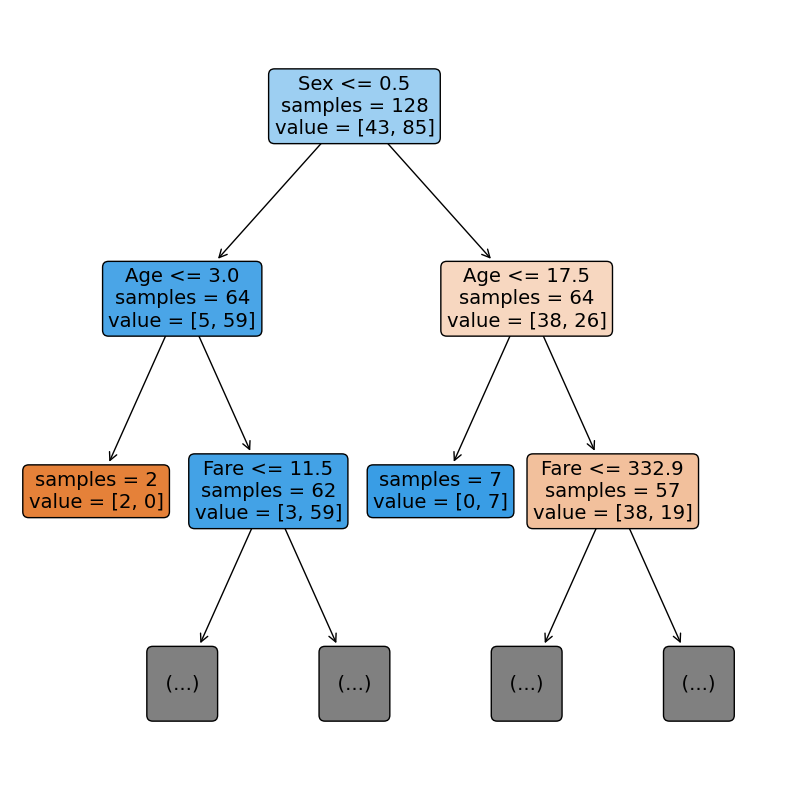

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plot_tree(decisiontree,
          max_depth=2,  #yalnızca ağacın ilk üç katmanının gösterilmesi gerektiğini belirtir.
          feature_names=X.columns,
          filled=True,
          impurity=False,
          rounded=True,
          precision=1)

plt.show()